# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice
combined_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Xpert Learning Assistant

duplicates = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get all the data for the duplicate mouse ID.
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice in the clean DataFrame. 
## It appears that the duplicate has note been removed because the .nunique() value is not changed.
## However, when I run the duplicates function, there are not duplicates present

clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
#Supported with Xpert Learning Assistant

grouped_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({
            "Mean Tumor Volume": grouped_df.mean(),
            "Median Tumor Volume": grouped_df.median(),
            "Tumor Volume Variance": grouped_df.var(),
            "Tumor Volume Std Dev": grouped_df.std(),
            "Tumor Volume Std Err": grouped_df.sem()
            })
                   
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

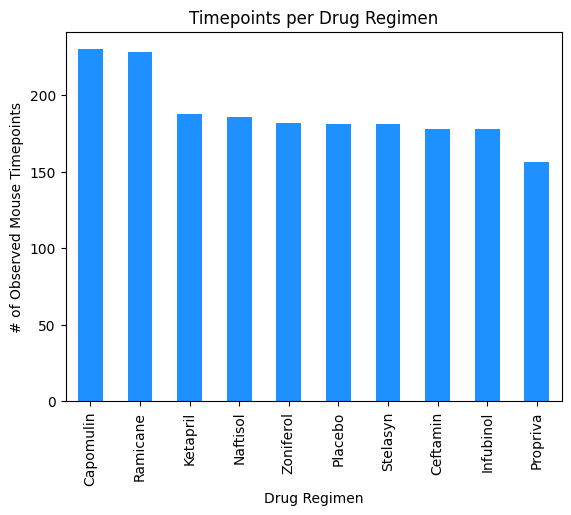

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Split data into groups based on drug regimen
drug_regimen = clean_df.groupby('Drug Regimen')

# Find out how many timepoints per drug regimen
timepoints = drug_regimen['Timepoint'].count()

# Organize timepoints 
# Xpert Learning Assistant helped correct code error
timepoints_sorted = timepoints.sort_values(ascending=False)

#Chart Data
timepoint_chart = timepoints_sorted.plot(kind="bar", title="Timepoints per Drug Regimen",  color='DodgerBlue')
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

<BarContainer object of 10 artists>

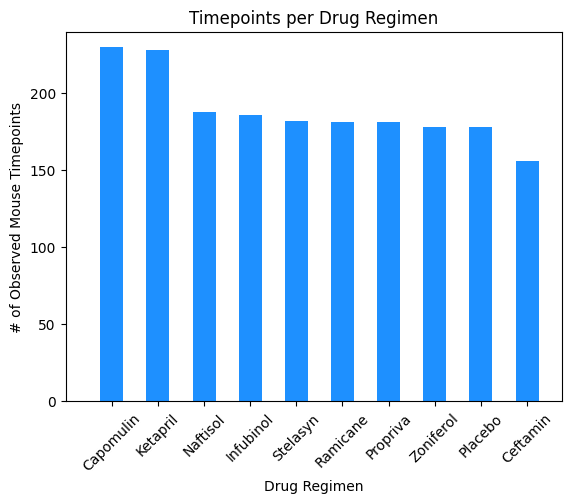

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Using variables created for previous bar graph
# drug_regimen = clean_df.groupby('Drug Regimen')
# timepoints = drug_regimen['Timepoint'].count()
# timepoints_sorted = timepoints.sort_values(ascending=False)

# create variables for plt.bar function
x_axis = np.arange(len(drug_regimen))
tick_locations = [value for value in x_axis]
labels = clean_df["Drug Regimen"].unique()

# create xticks
plt.xticks(tick_locations, labels=labels, rotation=45)

# set chart limits
plt.xlim(-1, len(x_axis)-.25)
plt.ylim(0, 240)

# create title and labels
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.bar(x_axis, timepoints_sorted, color='DodgerBlue', align='center', width=0.5)


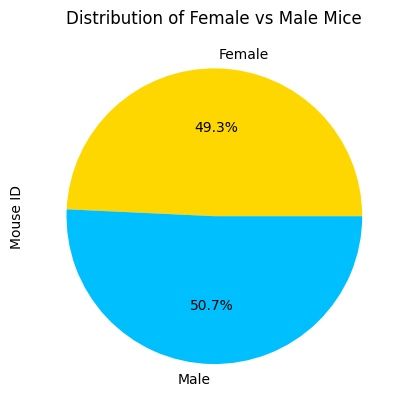

In [10]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Xpert Learning Assistant showed me how to efficiently combine two rows of code I had previously made
gender_group = clean_df.groupby('Sex')['Mouse ID'].count()

# Make the pie chart
#Chart Data
colors=["gold", "DeepSkyBlue"]
distribution = gender_group.plot(kind="pie", title="Distribution of Female vs Male Mice", colors=colors, autopct="%1.1f%%")

plt.show()

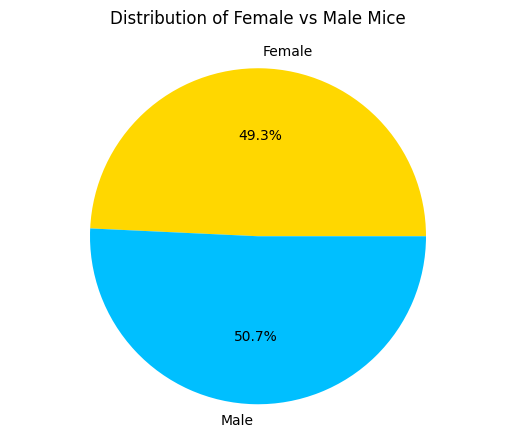

In [11]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# using variable from previous pie chart
# gender_group = clean_df.groupby('Sex')['Mouse ID'].count()

# create variables for plt.bar function
# Xpert Learning Assistant helped me to debug and fix some errors with my labels and counts

# get gender labels (female, male)
genders = gender_group.index

# get gender counts
gender_count = gender_group.values

colors = ["gold", "DeepSkyBlue"]

# Make the pie chart
plt.title("Distribution of Female vs Male Mice", pad=20)

plt.pie(gender_count, labels = genders, colors=colors,  autopct="%1.1f%%", startangle=360)
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Xpert Assistant helped me to correct the merge on=['Mouse ID', 'Timepoint']
final_tumor_volume_df = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'])
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# Xpert Learning Assistant recommended a dictionary instead of a list so treatments could be stored as keys
tumor_vol_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# calculate quartiles for each treatment separately

for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Xpert Learning Assistant helped me to identify necessary variables, 
    # provided the boolean operation == treatement, and the correct function to add to the dictionary

    # match treatment in treatments list as a key 
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]

    # collect the volume as a value that corresponds to each treatement
    final_volumes = treatment_data['Tumor Volume (mm3)']

    # add the resulting final tumor volumes for each drug to the empty list
    tumor_vol_data[treatment] = final_volumes.tolist()

    # add subset
    # Xpert Learning Assistant provided this code
    final_volumes_series = pd.Series(final_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = final_volumes_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #print(f"{treatment} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Identify potential outliers
    outliers = final_volumes_series[(final_volumes_series < lower_bound) | (final_volumes_series > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers.tolist()}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


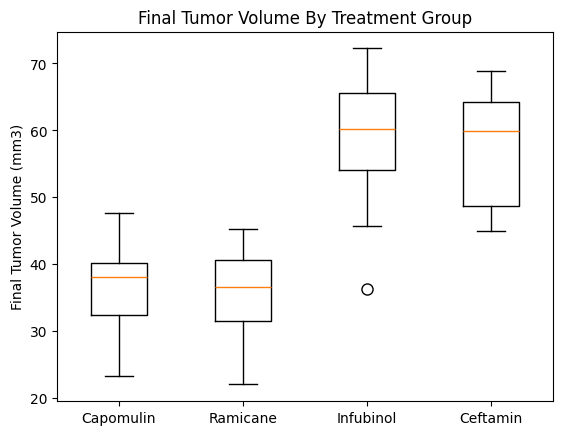

In [64]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Convert the tumor_vol_data dictionary to a DataFrame
# Xpert Assistant suggestion
tumor_vol_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in tumor_vol_data.items()]))

fig1, ax1 = plt.subplots()

ax1.set_title('Final Tumor Volume By Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')

# outlier is not customizing
ax1.boxplot(tumor_vol_df, tick_labels=treatments, flierprops=dict(marker='o', color='red', markersize=8, markeredgecolor='black'))
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
